In [1]:
%matplotlib inline

In [2]:
!pip3 install torch

     |████████████████████████████████| 750.6 MB 37 kB/s  eta 0:00:014█████████████████▌          | 503.9 MB 7.0 MB/s eta 0:00:36


In [4]:
!pip3 install tensorflow

     |████████████████████████████████| 497.6 MB 127 kB/s eta 0:00:01��████████████████▎       | 377.8 MB 3.4 MB/s eta 0:00:36
     |████████████████████████████████| 4.3 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 3.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 2.7 MB/s eta 0:00:01
     |████████████████████████████████| 80 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 1.3 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 312 kB/s eta 0:00:01  | 12.2 MB 312 kB/s eta 0:00:08
     |██████████████████████

In [6]:
!pip3 install torchvision

     |████████████████████████████████| 21.0 MB 2.9 MB/s eta 0:00:01


In [11]:
!pip3 install google.colab

     |████████████████████████████████| 72 kB 670 kB/s eta 0:00:01
     |████████████████████████████████| 64 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 104 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 758 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 11.8 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 484 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 245 kB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 2.9 MB/s eta 0:00:01
  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102274 sha256=5a433dce0d73cd55bcd038fcb55b553fdf3142f7ac90fb8783cebbf06de5ef44
  Stored in directory: /home/tainella/.cache/pip/wheels/e4/e7/91/b2736701bca00e273fdc79f80e2727b558e0903d81b758eb69
  ERROR: Command errored out with exit 

In [21]:
from __future__ import print_function, division

import torch
import tensorflow as tf
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
import torch.utils.data as data
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
import os.path
import copy
from torch.nn import functional as F

cudnn.benchmark = True
plt.ion()   # interactive mode

In [12]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [3]:
!unzip ./short_better_fer_2013

Archive:  ./short_better_fer_2013.zip
  inflating: short_better_fer_2013/.DS_Store  
  inflating: short_better_fer_2013/train/.DS_Store  
  inflating: short_better_fer_2013/train/CONTEMPT/63.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/823.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/2100.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/1409.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/2114.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/77.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/837.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/1353.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/1435.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/1347.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/638.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/1390.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/162.jpg  
  inflating: short_better_fer_2013/train/CONTEMPT/176.jpg  
  inflating: shor

In [4]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './short_better_fer_2013'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
print(device)

cuda:0


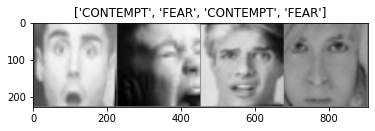

In [6]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


inputs, classes = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

Training the model
------------------

Now, let's write a general function to train a model. Here, we will
illustrate:

-  Scheduling the learning rate
-  Saving the best model

In the following, parameter ``scheduler`` is an LR scheduler object from
``torch.optim.lr_scheduler``.



In [7]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [8]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

Finetuning the convnet
----------------------

Load a pretrained model and reset final fully connected layer.




In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Train and evaluate
^^^^^^^^^^^^^^^^^^

It should take around 15-25 min on CPU. On GPU though, it takes less than a
minute.




In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.6357 Acc: 0.7330
val Loss: 0.4175 Acc: 0.8108

Epoch 1/9
----------
train Loss: 0.4688 Acc: 0.8017
val Loss: 0.1473 Acc: 0.9432

Epoch 2/9
----------
train Loss: 0.4404 Acc: 0.8223
val Loss: 0.2289 Acc: 0.9264

Epoch 3/9
----------
train Loss: 0.3900 Acc: 0.8389
val Loss: 0.1312 Acc: 0.9535

Epoch 4/9
----------
train Loss: 0.3161 Acc: 0.8726
val Loss: 0.1529 Acc: 0.9484

Epoch 5/9
----------
train Loss: 0.2938 Acc: 0.8858
val Loss: 0.1679 Acc: 0.9258

Epoch 6/9
----------
train Loss: 0.2721 Acc: 0.8955
val Loss: 0.0986 Acc: 0.9677

Epoch 7/9
----------
train Loss: 0.2007 Acc: 0.9224
val Loss: 0.0509 Acc: 0.9845

Epoch 8/9
----------
train Loss: 0.1792 Acc: 0.9278
val Loss: 0.0504 Acc: 0.9877

Epoch 9/9
----------
train Loss: 0.1773 Acc: 0.9299
val Loss: 0.0445 Acc: 0.9877

Training complete in 17m 15s
Best val Acc: 0.987734


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


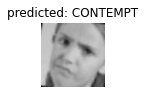

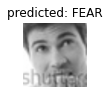

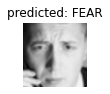

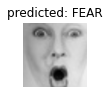

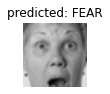

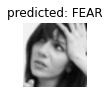

In [ ]:
visualize_model(model_ft)

ConvNet as fixed feature extractor
----------------------------------

Here, we need to freeze all the network except the final layer. We need
to set ``requires_grad = False`` to freeze the parameters so that the
gradients are not computed in ``backward()``.

You can read more about this in the documentation
`here <https://pytorch.org/docs/notes/autograd.html#excluding-subgraphs-from-backward>`__.




In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.6684 Acc: 0.7057
val Loss: 0.7975 Acc: 0.6559

Epoch 1/9
----------
train Loss: 0.6303 Acc: 0.7215
val Loss: 0.3235 Acc: 0.8618

Epoch 2/9
----------
train Loss: 0.6545 Acc: 0.7219
val Loss: 0.3715 Acc: 0.8522

Epoch 3/9
----------
train Loss: 0.6252 Acc: 0.7390
val Loss: 0.2934 Acc: 0.8715

Epoch 4/9
----------
train Loss: 0.6177 Acc: 0.7311
val Loss: 0.3293 Acc: 0.8599

Epoch 5/9
----------
train Loss: 0.6319 Acc: 0.7286
val Loss: 0.5526 Acc: 0.7592

Epoch 6/9
----------
train Loss: 0.6358 Acc: 0.7314
val Loss: 0.3256 Acc: 0.8644

Epoch 7/9
----------
train Loss: 0.4852 Acc: 0.7746
val Loss: 0.2762 Acc: 0.8793

Epoch 8/9
----------
train Loss: 0.4782 Acc: 0.7791
val Loss: 0.2970 Acc: 0.8754

Epoch 9/9
----------
train Loss: 0.4775 Acc: 0.7757
val Loss: 0.2922 Acc: 0.8786

Training complete in 7m 52s
Best val Acc: 0.879277


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


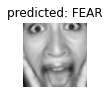

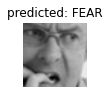

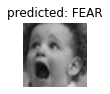

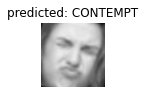

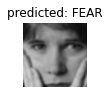

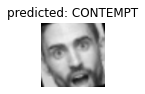

In [ ]:
visualize_model(model_conv)

plt.ioff()
plt.show()

In [ ]:
#попробую с другой моделью
model_ft = models.vgg16(pretrained=True)
print(model_ft)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
print(model_ft.fc)

нужно заменять последний 6 слой классификатора

In [ ]:
#обучаю целиком, заменив последний слой
model_ft = models.vgg16(pretrained=True)
num_ftrs = model_ft.classifier[6].in_features

model_ft.classifier[6] = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.5021 Acc: 0.7531
val Loss: 0.2906 Acc: 0.8812

Epoch 1/9
----------
train Loss: 0.3845 Acc: 0.8159
val Loss: 0.4002 Acc: 0.8451

Epoch 2/9
----------
train Loss: 0.3214 Acc: 0.8547
val Loss: 0.2242 Acc: 0.8870

Epoch 3/9
----------
train Loss: 0.2911 Acc: 0.8668
val Loss: 0.1227 Acc: 0.9548

Epoch 4/9
----------
train Loss: 0.2668 Acc: 0.8783
val Loss: 0.1593 Acc: 0.9251

Epoch 5/9
----------
train Loss: 0.2419 Acc: 0.8942
val Loss: 0.1053 Acc: 0.9593

Epoch 6/9
----------
train Loss: 0.2150 Acc: 0.9126
val Loss: 0.2160 Acc: 0.9025

Epoch 7/9
----------
train Loss: 0.1450 Acc: 0.9402
val Loss: 0.0380 Acc: 0.9871

Epoch 8/9
----------
train Loss: 0.1269 Acc: 0.9492
val Loss: 0.0334 Acc: 0.9858

Epoch 9/9
----------
train Loss: 0.1158 Acc: 0.9523
val Loss: 0.0344 Acc: 0.9826

Training complete in 80m 44s
Best val Acc: 0.987088


In [ ]:
#обучаю только последний слой
model_conv = torchvision.models.vgg16(pretrained=True)

num_ftrs = model_ft.classifier[6].in_features

for param in model_conv.parameters():
    param.requires_grad = False
    
model_conv.classifier[6] = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.classifier[6].parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 1.1846 Acc: 0.7106
val Loss: 0.3469 Acc: 0.8657

Epoch 1/9
----------
train Loss: 1.2253 Acc: 0.7380
val Loss: 1.1158 Acc: 0.7321

Epoch 2/9
----------
train Loss: 1.2985 Acc: 0.7333
val Loss: 2.5032 Acc: 0.6004

Epoch 3/9
----------
train Loss: 1.3591 Acc: 0.7336
val Loss: 0.4091 Acc: 0.8664

Epoch 4/9
----------
train Loss: 1.3916 Acc: 0.7398
val Loss: 0.6219 Acc: 0.8244

Epoch 5/9
----------
train Loss: 1.2901 Acc: 0.7401
val Loss: 0.9102 Acc: 0.7682

Epoch 6/9
----------
train Loss: 1.3095 Acc: 0.7398
val Loss: 0.5006 Acc: 0.8580

Epoch 7/9
----------
train Loss: 0.9879 Acc: 0.7630
val Loss: 0.3705 Acc: 0.8670

Epoch 8/9
----------
train Loss: 0.8270 Acc: 0.7822
val Loss: 0.4518 Acc: 0.8457

Epoch 9/9
----------
train Loss: 0.7928 Acc: 0.7694
val Loss: 0.3490 Acc: 0.8689

Training complete in 31m 17s
Best val Acc: 0.868948


In [9]:
def has_file_allowed_extension(filename):
    filename_lower = filename.lower()
    return any(filename_lower.endswith(ext) for ext in IMG_EXTENSIONS)


def find_classes(dir):
    classes = [d for d in os.listdir(dir) if  os.path.isdir (os.path.join (dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in  range (len (classes))}
    return classes, class_to_idx


def make_dataset(dir, class_to_idx):
    images = []
    dir = os.path.expanduser(dir)
    for target in sorted(os.listdir(dir)):
        d = os.path.join(dir, target)
        if not os.path.isdir(d):
            continue

        for root, _, fnames in  sorted (os.walk (d)):
            for fname in sorted(fnames):
                if has_file_allowed_extension(fname):
                    path = os.path.join(root, fname)
                    item = (path, class_to_idx[target])
                    images.append (item)
    return  images

IMG_EXTENSIONS = ['.jpg', '.jpeg', '.png', '.ppm', '.bmp', '.pgm', '.tif']


def pil_loader(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return img.convert('RGB')


class MyDataset(data.Dataset):
  def __init__(self, root, transform = None):
        classes, class_to_idx = find_classes(root)
        samples = make_dataset(root, class_to_idx)
        if len(samples) == 0:
            raise(RuntimeError("Found 0 files in subfolders of: " + root + "\n"))
        self.root = root
        self.classes = classes
        self.class_to_idx = class_to_idx
        self.samples = samples
        self.transform = transform
        self.imgs = self.samples
        self.loader = pil_loader
  
  def __len__(self):
    return len(self.samples)

  def __getitem__(self, index):
    path, target = self.samples[index]
    sample = self.loader(path)
    if self.transform is not None:
        sample = self.transform(sample)
    return sample, target

In [10]:
my_datasets = {x: MyDataset(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(my_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(my_datasets[x]) for x in ['train', 'val']}
class_names = my_datasets['train'].classes

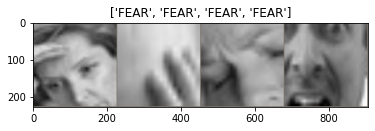

In [11]:
inputs, classes = next(iter(dataloaders['train']))

out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [12]:
#обучу сеть на своем MyDataset
#обучаю целиком:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/tainella/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [13]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6319 Acc: 0.7274
val Loss: 0.4219 Acc: 0.7876

Epoch 1/9
----------
train Loss: 0.5060 Acc: 0.7913
val Loss: 0.2881 Acc: 0.9077

Epoch 2/9
----------
train Loss: 0.4168 Acc: 0.8309
val Loss: 0.1378 Acc: 0.9471

Epoch 3/9
----------
train Loss: 0.3339 Acc: 0.8634
val Loss: 0.4875 Acc: 0.7824

Epoch 4/9
----------
train Loss: 0.3188 Acc: 0.8750
val Loss: 0.1348 Acc: 0.9464

Epoch 5/9
----------
train Loss: 0.2807 Acc: 0.8889
val Loss: 0.0986 Acc: 0.9638

Epoch 6/9
----------
train Loss: 0.2472 Acc: 0.9012
val Loss: 0.0796 Acc: 0.9677

Epoch 7/9
----------
train Loss: 0.1869 Acc: 0.9239
val Loss: 0.0390 Acc: 0.9884

Epoch 8/9
----------
train Loss: 0.1722 Acc: 0.9346
val Loss: 0.0452 Acc: 0.9884

Epoch 9/9
----------
train Loss: 0.1690 Acc: 0.9341
val Loss: 0.0327 Acc: 0.9910

Training complete in 4m 1s
Best val Acc: 0.990962


In [14]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [15]:
model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6710 Acc: 0.6980
val Loss: 0.3023 Acc: 0.8709

Epoch 1/9
----------
train Loss: 0.6109 Acc: 0.7251
val Loss: 0.4760 Acc: 0.8012

Epoch 2/9
----------
train Loss: 0.6350 Acc: 0.7301
val Loss: 0.3999 Acc: 0.8309

Epoch 3/9
----------
train Loss: 0.6260 Acc: 0.7327
val Loss: 0.5612 Acc: 0.7469

Epoch 4/9
----------
train Loss: 0.6434 Acc: 0.7267
val Loss: 0.3385 Acc: 0.8612

Epoch 5/9
----------
train Loss: 0.6303 Acc: 0.7217
val Loss: 0.3211 Acc: 0.8702

Epoch 6/9
----------
train Loss: 0.6246 Acc: 0.7322
val Loss: 0.3878 Acc: 0.8328

Epoch 7/9
----------
train Loss: 0.5047 Acc: 0.7689
val Loss: 0.3035 Acc: 0.8722

Epoch 8/9
----------
train Loss: 0.4814 Acc: 0.7707
val Loss: 0.3272 Acc: 0.8644

Epoch 9/9
----------
train Loss: 0.4867 Acc: 0.7720
val Loss: 0.3059 Acc: 0.8677

Training complete in 1m 50s
Best val Acc: 0.872176


In [67]:
#своя сеть из слоёв, обучаю на датасете своего класса MyDataset
class SimpleCnn(nn.Module):
  
    def __init__(self, n_classes):
        super().__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=96, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        
        self.out = nn.Linear(96 * 5 * 5, n_classes)
  
  
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)

        x = x.view(x.size(0), -1)
        logits = self.out(x)
        return logits

In [71]:
model = SimpleCnn(2).to(device)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

In [72]:
model = train_model(model, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=10)

Epoch 0/9
----------
train Loss: 0.6176 Acc: 0.6639
val Loss: 0.5892 Acc: 0.6733

Epoch 1/9
----------
train Loss: 0.5956 Acc: 0.6830
val Loss: 0.5349 Acc: 0.7159

Epoch 2/9
----------
train Loss: 0.5607 Acc: 0.7087
val Loss: 0.5109 Acc: 0.7437

Epoch 3/9
----------
train Loss: 0.5325 Acc: 0.7364
val Loss: 0.4851 Acc: 0.7553

Epoch 4/9
----------
train Loss: 0.5051 Acc: 0.7561
val Loss: 0.4332 Acc: 0.7876

Epoch 5/9
----------
train Loss: 0.4894 Acc: 0.7634
val Loss: 0.4280 Acc: 0.7779

Epoch 6/9
----------
train Loss: 0.4766 Acc: 0.7678
val Loss: 0.4019 Acc: 0.7966

Epoch 7/9
----------
train Loss: 0.4551 Acc: 0.7808
val Loss: 0.3835 Acc: 0.8031

Epoch 8/9
----------
train Loss: 0.4466 Acc: 0.7849
val Loss: 0.3796 Acc: 0.8050

Epoch 9/9
----------
train Loss: 0.4400 Acc: 0.7846
val Loss: 0.3844 Acc: 0.8005

Training complete in 1m 29s
Best val Acc: 0.805036


In [ ]:
#очевидно, что результат обучения гораздо хуже, чем на других усложненных сетях: resnet18, vgg16
#при попытке запустить с оптимизатором Adam сеть совсем не училась (всего на пару процентов),
#но SGD с моментом спас ситуацию

In [ ]:
#результаты дообучения:

#resnet18 целиком на ImageFolder 98%
#resnet18 последний слой на ImageFolder 87%

#vgg16 целиком на ImageFolder 98%
#vgg16 последний слой на ImageFolder 86%

#resnet18 целиком на MyDataset 99%
#resnet18 последний слой на MyDataset 87%

#моя сверточная сеть на MyDataset 80%